In [30]:
#importing libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np

In [31]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [32]:
#dataset infor
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc            

In [33]:
#identifying missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [34]:
#dropping missing values
df.drop(columns=['id'], inplace=True)
print("Dropped 'id' column.")

Dropped 'id' column.


In [35]:
#Handling Missing values
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("Missing values handled.")

Missing values handled.


In [36]:
#Using Label Encoder for Encoding Categorial Values
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for inverse transformation if needed

print("Categorical variables encoded.")

Categorical variables encoded.


In [37]:
#Normalizing Numerical Features
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Numerical features normalized.")

Numerical features normalized.


In [38]:
# Drop rows where classification is 1
df = df[df['classification'] != 1]

In [39]:
#Saving preprocessed Data
df.to_csv('kidney_disease_preprocessed.csv', index=False)
print("Preprocessed dataset saved as 'kidney_disease_preprocessed.csv'")

Preprocessed dataset saved as 'kidney_disease_preprocessed.csv'


In [40]:
print("Dataset after preprocessing:")
print(df.head())

print("\nMissing Values after Preprocessing:")
print(df.isnull().sum())

print("\nDataset Information after Preprocessing:")
print(df.info())

Dataset after preprocessing:
        age        bp    sg   al   su  rbc  pc  pcc  ba       bgr  ...  pcv  \
0  0.522727  0.230769  0.75  0.2  0.0    1   1    0   0  0.211538  ...   32   
1  0.056818  0.000000  0.75  0.8  0.0    1   1    0   0  0.269309  ...   26   
2  0.681818  0.230769  0.25  0.4  0.6    1   1    0   0  0.856838  ...   19   
3  0.522727  0.153846  0.00  0.8  0.0    1   0    1   0  0.202991  ...   20   
4  0.556818  0.230769  0.25  0.4  0.0    1   1    0   0  0.179487  ...   23   

   wc  rc  htn  dm  cad  appet  pe  ane  classification  
0  72  34    1   4    1      0   0    0               0  
1  56  34    0   3    1      0   0    0               0  
2  70  34    0   4    1      1   0    1               0  
3  62  19    1   3    1      1   1    1               0  
4  68  27    0   3    1      0   0    0               0  

[5 rows x 25 columns]

Missing Values after Preprocessing:
age               0
bp                0
sg                0
al                0
su      

In [41]:
#Data Exploration Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
import pandas as pd

# Load the dataset
df = pd.read_csv('kidney_disease_preprocessed.csv')
print("Dataset Loaded")

# Drop rows where classification is 1
df = df[df["classification"] != 1]

# Split features and target
X = df.drop("classification", axis=1).values
y = df["classification"].values

Dataset Loaded


In [43]:
# Find the rows where classification is 1
classification_1 = df[df["classification"] == 1]

# Display the examples where classification is 1
print(classification_1)


Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification]
Index: []

[0 rows x 25 columns]


In [ ]:
#Data Visulaization

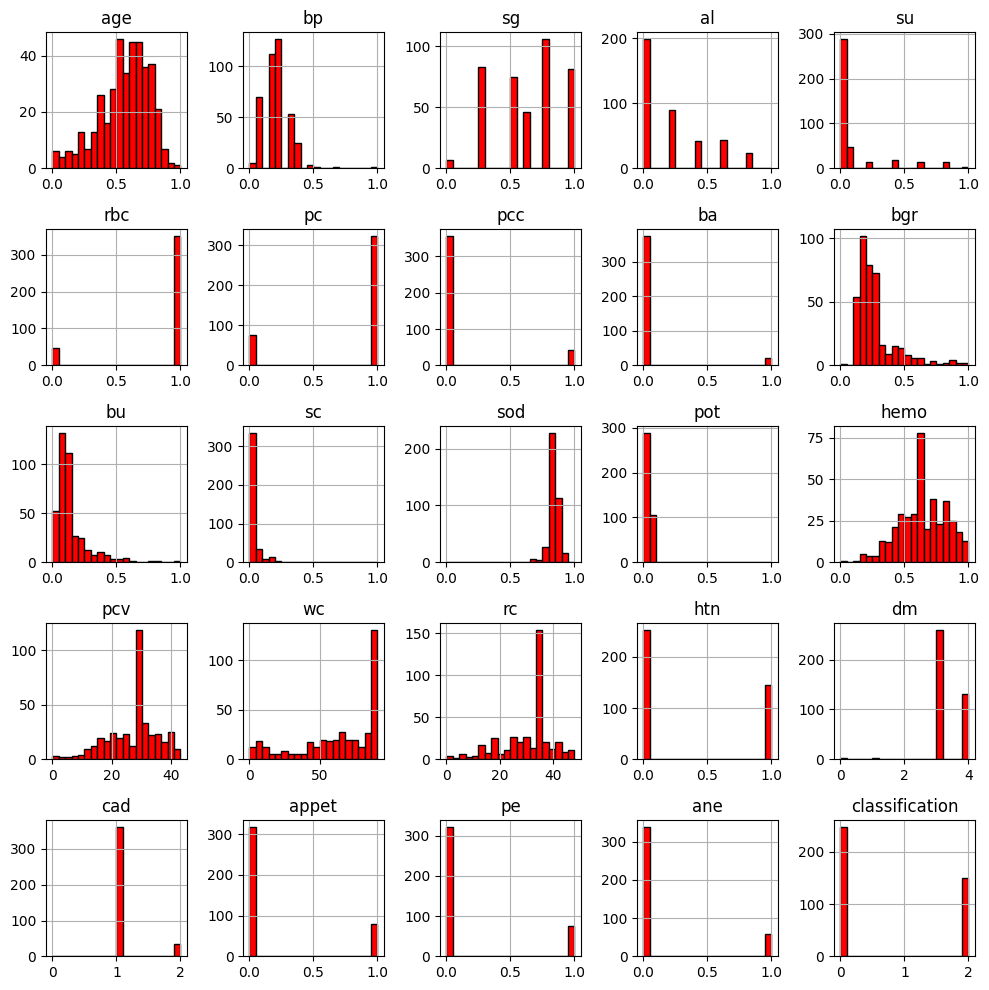

In [44]:
#Histograms
#Histogram for the Dataset
histograms = df.hist(figsize=(10,10),bins = 20, color = 'red', edgecolor = 'black')
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

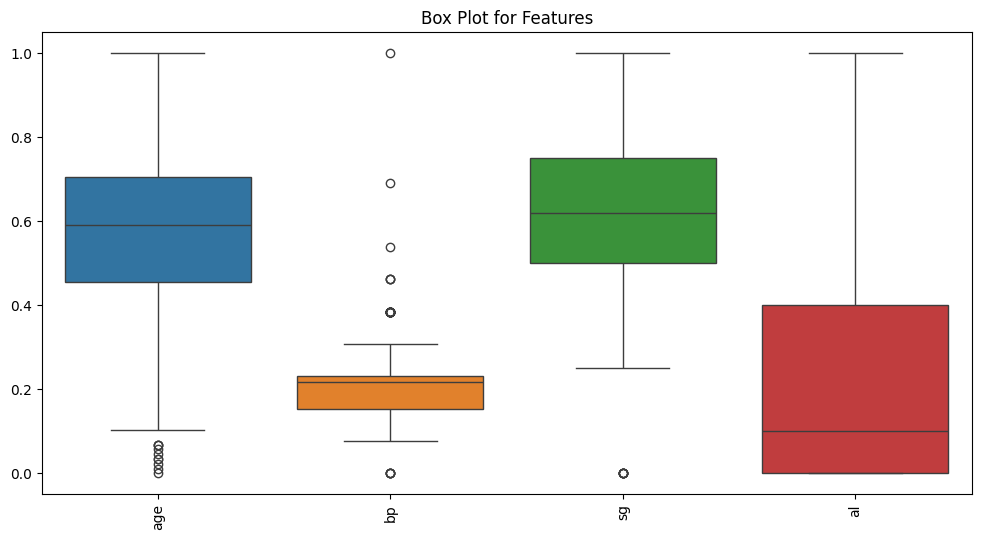

In [45]:
#Box Plots
#Drawing Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'bp', 'sg','al']])
plt.title('Box Plot for Features')
plt.xticks(rotation=90)
plt.show()

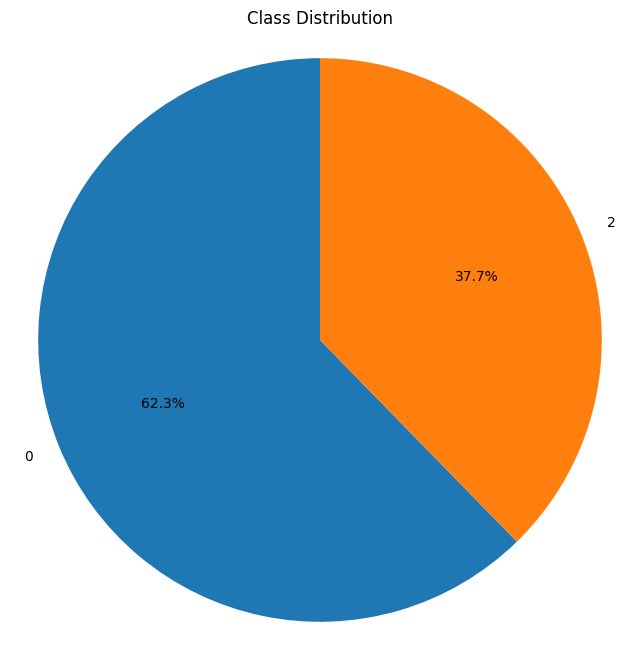

In [46]:
#Pie Chart
#To make a pie chart
target_counts = df['classification'].value_counts()
plt.figure(figsize=(8, 8))
plt.title('Class Distribution')
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

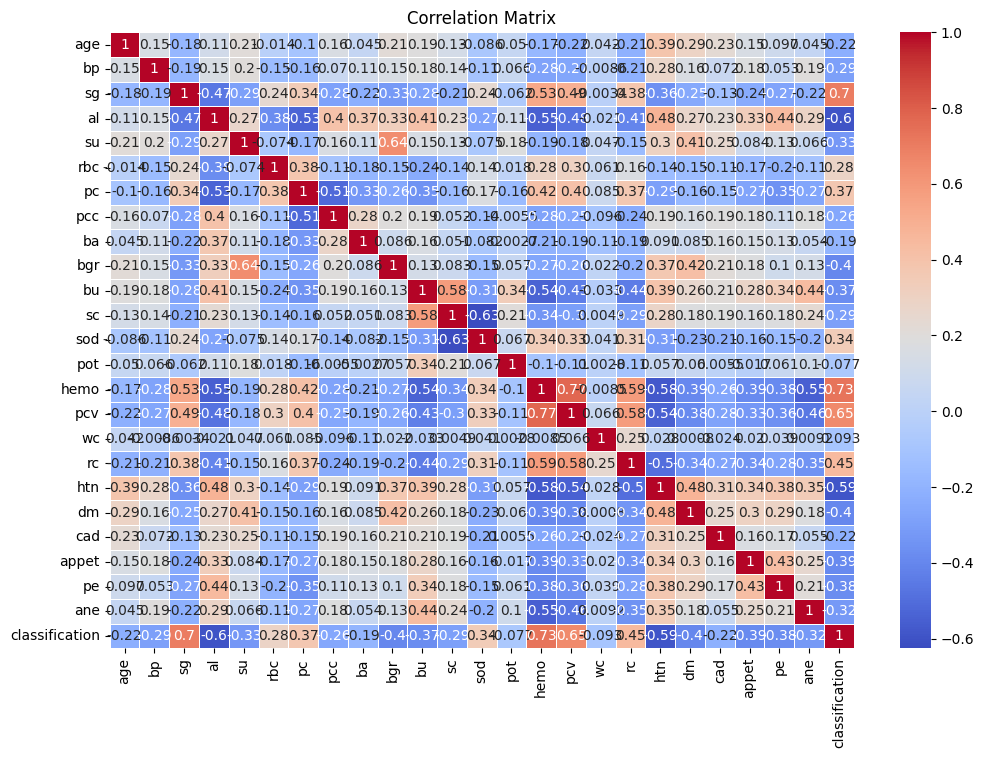

In [47]:
#Heatmap
# Correlation Matrix (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Age vs. Blood Pressure')

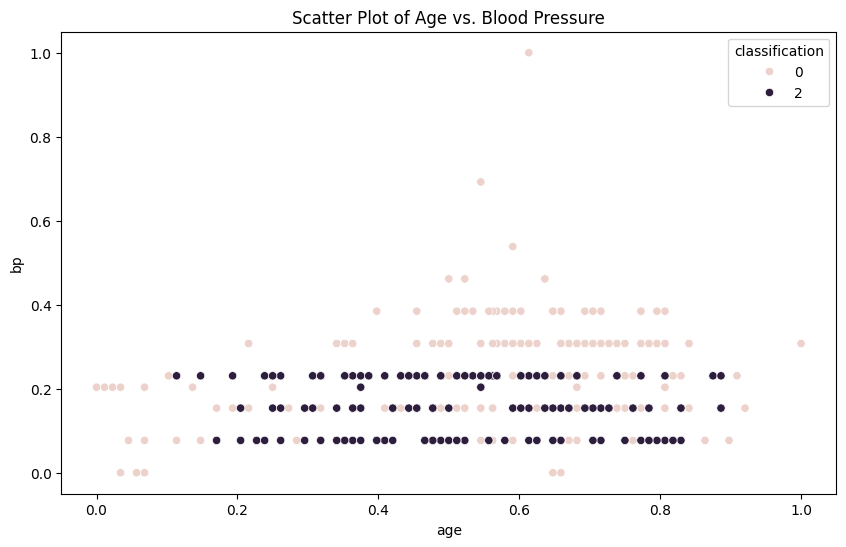

In [48]:
#Scatter Plot
#To create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bp', hue='classification', data=df)
plt.title('Scatter Plot of Age vs. Blood Pressure')

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [50]:
df["classification"] = df["classification"].replace({"ckd": 1, "notckd": 0})

# Split features and target
X = df.drop("classification", axis=1).values
y = df["classification"].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for many models, including Random Forest)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
import pandas as pd

# Combine X_test and y_test into a single DataFrame for saving
test_data = pd.DataFrame(X_test, columns=[f"feature_{i}" for i in range(X_test.shape[1])])
test_data["classification"] = y_test

# Save the test data to a CSV file
test_data.to_csv("test_data.csv", index=False)

print("Test data saved to 'test_data.csv'")

Test data saved to 'test_data.csv'


In [52]:
# Find the rows where classification is 1
classification_1 = df[df["classification"] == 1]

# Display the examples where classification is 1
print(classification_1)

Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification]
Index: []

[0 rows x 25 columns]


In [53]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        return np.array([self._predict_one(x, self.root) for x in X])

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stop criteria
        if depth >= self.max_depth or n_labels == 1 or n_samples < 2:
            leaf_value = self._most_common_label(y)
            return {"leaf": True, "value": leaf_value}

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y)

        # Grow the children recursively
        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        left = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {"leaf": False, "feature": best_feature, "threshold": best_threshold, "left": left, "right": right}

    def _best_split(self, X, y):
        best_gain = -1
        best_feature, best_threshold = None, None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self._information_gain(X[:, feature], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature, best_threshold = feature, threshold

        return best_feature, best_threshold

    def _information_gain(self, feature, y, threshold):
        # Split the data
        left_indices = feature < threshold
        right_indices = ~left_indices
        if len(left_indices) == 0 or len(right_indices) == 0:
            return 0

        # Calculate impurity
        parent_impurity = self._gini(y)
        n = len(y)
        n_left, n_right = len(y[left_indices]), len(y[right_indices])
        left_impurity = self._gini(y[left_indices])
        right_impurity = self._gini(y[right_indices])

        # Calculate information gain
        weighted_avg = (n_left / n) * left_impurity + (n_right / n) * right_impurity
        return parent_impurity - weighted_avg

    def _gini(self, y):
        proportions = np.bincount(y) / len(y)
        return 1 - np.sum(proportions ** 2)

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def _predict_one(self, x, node):
        if node["leaf"]:
            return node["value"]
        if x[node["feature"]] < node["threshold"]:
            return self._predict_one(x, node["left"])
        return self._predict_one(x, node["right"])

In [54]:
# Define the Random Forest class
class RandomForest:
    def __init__(self, n_trees=10, max_depth=None, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        n_samples = X.shape[0]

        for _ in range(self.n_trees):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]

            # Train a decision tree
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Aggregate predictions from all trees
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=tree_predictions)


In [55]:
# Train and test Random Forest on CKD dataset
rf = RandomForest(n_trees=10, max_depth=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9875


In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the test data
test_data = pd.read_csv('test_data.csv')


# Separate features and target from test data
X_test_new = test_data.drop("classification", axis=1).values
y_test_new = test_data["classification"].values

# If scaling was applied during training, apply the same scaling to the test data
scaler = StandardScaler()
X_test_new = scaler.fit_transform(X_test_new)  # Using the same scaler

# Make predictions using the trained Random Forest model
y_pred_new = rf.predict(X_test_new)

# Evaluate performance
accuracy = accuracy_score(y_test_new, y_pred_new)
print(f"Random Forest Accuracy on Test Data: {accuracy}")


Random Forest Accuracy on Test Data: 0.975


In [57]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test_new, y_pred_new)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test_new, y_pred_new))

Confusion Matrix:
[[50  2]
 [ 0 28]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           2       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

